In [1]:
import requests 

def downloadDataSet(url,destNameFile): 
    """
    Download Data Set
    """
    response = requests.get(url)
    if response.status_code == 200: 
        with open(destNameFile, 'wb') as f:
            f.write(response.content)
        
        response.close()
        return True 
    
    response.close()
    print("Request Error , http statuscode : ",response.status_code)
    return False 

--------

In [2]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv"

In [3]:
namaFile = "property_data.csv"
status = downloadDataSet(url,namaFile)
print(status)

True


In [4]:
import pandas as pd 
import numpy as np 

In [5]:
df = pd.read_csv(namaFile)

In [6]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Sekarang kita dapat menjawab pertanyaan awal kita, apa saja fiturnya? Cukup mudah untuk menyimpulkan fitur-fitur berikut dari nama kolom:

* ST_NUM: Street number
* ST_NAME: Street name
* OWN_OCCUPIED: Pemiliknya menempati ? 
* NUM_BEDROOMS: Number of bedrooms
* NUM_BATH : number bathrooms 

SQ_FT : square foot 

tipe apa yang diharapkan?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


* ST_NUM: float or int… some sort of numeric type
* ST_NAME: string
* OWN_OCCUPIED: string… Y (“Yes”) or N (“No”)
* NUM_BEDROOMS: float or int, a numeric type

Untuk menjawab dua pertanyaan berikutnya, kita perlu mulai mempelajari Pandas lebih jauh. Mari kita lihat contoh cara mendeteksi missing values.


### Standard Missing Values
    
    Jadi apa yang dimaksud dengan "standard missing values"? Standard missing values adalah missing values yang dapat dideteksi Pandas.

Kembali ke dataset original kita, mari kita lihat kolom "Street Number".

Sebelum kita pada dataset property data kita coba praktikan kembali terkait apply dan loc 

In [7]:
dfa = pd.DataFrame([[2,3,1], [3,2,2], [2,4,4]], columns=list("ABC"))
dfa

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [8]:
dfa.apply?

Signature:
dfa.apply(
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type=None,
    args=(),
    **kwargs,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray object:

    * ``False`` : passes each row or column as a Series to the
      function.
    * ``True`` : 

In [35]:

dfa.apply(lambda x : x['A'], axis =1)  

0    2
1    3
2    2
dtype: int64

In [9]:
dfa.apply(lambda x : x['A'], axis =0) # Error KeyError: 'A'

KeyError: 'A'

In [10]:
dfa.apply(lambda x : x, axis =1)

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [11]:
dfa.iloc[0:1,]     #  0:1 , 1 not include   row , get all kolumn,  .shape 1,3  #ndim  2 dim 

,A,B,C
0,2,3,1


In [26]:
#Access a group of rows and columns by label(s) or a boolean array 
dfa.loc[0]   # default axis = 0 .ndim  1 dim ,   shape 3,1 

A    2
B    3
C    1
Name: 0, dtype: int64

In [27]:
dfa.loc[0:1]   # 2 dimensi  3, , m:n  n is include

,A,B,C
0,2,3,1
1,3,2,2


In [31]:
dfa.iloc[0]

A    2
B    3
C    1
Name: 0, dtype: int64

In [54]:
# kita ingin memberikan warna merah pada data frame variabel dfa 
#  jika data tersebut harus lebih besar dari baris 0  [2,3,1] 
# try change axis 
# 2 >  [2,3,1]
# 3 > [2,3,1]
# 1 > 
# axis = 0 kolom 
# axis = 1 baris 
dfa.style.apply(lambda x: ["background: red" if v >= x.iloc[0] else "" for v in x], axis = 0)

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [35]:
dfx = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
dfx


,A,B
0,4,9
1,4,9
2,4,9


In [36]:

dfx.apply(np.sqrt)



,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [37]:
dfx.apply(np.sum, axis=0)   # apply utk tiap kolom 

A    12
B    27
dtype: int64

In [40]:
dfx.apply(np.sum, axis=1)  # apply utk tiap baris 

0    13
1    13
2    13
dtype: int64

In [42]:
# Returning a list-like will result in a Series [1.2]
dfx.apply(lambda x: [1, 2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [43]:
#Passing ``result_type='expand'`` will expand list-like results to columns of a Dataframe
dfx.apply(lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [47]:

dfx.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


------

### Standard Missing Values
    
    Jadi apa yang dimaksud dengan "standard missing values"? Standard missing values adalah missing values yang dapat dideteksi Pandas.

Kembali ke dataset original kita, mari kita lihat kolom "Street Number".


In [48]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [49]:
street_num = df.loc[:,['ST_NUM']]
street_num

,ST_NUM
0,104.0
1,197.0
2,NaN
3,201.0
4,203.0
5,207.0
6,NaN
7,213.0
8,215.0


In [50]:
import math 
def highlight_column_nan(column):    
    """
    Function untuk me return background-color
    """
    highlight = 'background-color: palegreen;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [highlight if math.isnan(v)  else default for v in column]
    
#df.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0)


In [51]:
# untuk menampilkan beberapa kolom
street_num = df.loc[:,['ST_NUM','ST_NAME','NUM_BEDROOMS','OWN_OCCUPIED']]
street_num

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3,Y
1,197.0,LEXINGTON,3,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1,12
4,203.0,BERKELEY,3,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2,NaN
7,213.0,TREMONT,--,Y
8,215.0,TREMONT,na,Y


df.apply?

* 0 or 'index': apply function to each column.
* 1 or 'columns': apply function to each row.

agak berbeda dengan dataframe axis = 0 baris , axis = 1 kolom

In [55]:
# melakukan apply function highlight_column_nan
street_num.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


In [56]:
# menampilkan st_num 
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [57]:
# melakukan pengecekan is null / isna 
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [58]:
# melakukan pengecekan is null / isna 
df['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

### Non-Standard Missing Values

  kita coba melihat ada beberapa data yang tidak standard yang akan menjadikan missing values
  Pada num_bedrooms 

In [59]:
import math 

missing_values = ["n/a", "na", "--"]

#str(1e400*0) == NaN
def highlight_column_missing_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [highlight if str(v) == str(1e400*0) or v in missing_values else default for v in column]
    
#df.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0)


In [60]:
street_num.style.apply(highlight_column_missing_values, subset=['NUM_BEDROOMS'], axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


Di kolom ini, ada empat missing values.

* n/a
* NA
* —
* na
Dari bagian sebelumnya, kita tahu bahwa Pandas akan mengenali “NA” sebagai missing value, tapi bagaimana dengan yang lain? Mari lihat. dengan pengecekan is null 

In [61]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [62]:
# kita coba lakukan pengecekan menggunakan is null
df['NUM_BEDROOMS'].isnull()
# perhatikan baris 7 dan 8 

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Pada index ke 7 & 8  is null tdk true dengan kata lain tdk di identifikasikan sebaga NA 

In [63]:
## membuat list missing values 
missing_values = ["n/a", "na", "--"]

In [64]:
df = pd.read_csv(namaFile, na_values = missing_values) # didifinisikan kategory sebaga NA 

In [65]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [66]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

Kali ini, semua format berbeda dikenali sebagai missing values.

Kalian mungkin tidak dapat langsung menangkap semua ini. Saat kalian mengerjakan data dan melihat tipe lain dari nilai yang hilang, kalian bisa menambahkannya ke daftar.

Penting untuk mengenali jenis missing values non-standar ini untuk tujuan meringkas dan mengubah missing values. Jika kalian mencoba dan menghitung jumlah nilai yang hilang sebelum mengonversi jenis non-standar ini, kalian bisa kehilangan banyak missing values.

Di bagian selanjutnya kita akan melihat jenis missing values yang lebih rumit, tetapi sangat umum.

-------

### Unexpected Missing Values


Sejauh ini kita telah melihat missing values, dan non-standard missing values. Bagaimana jika kita memiliki tipe yang tidak terduga? Misalnya, jika fitur kita diharapkan berupa string, tetapi malah jenisnya numerik, maka secara teknis ini juga merupakan missing value.


Mari kita lihat kolom "Owner Occupied" untuk mengetahuinya.

In [67]:
values_real = ["Y", "N", "y","n"]

def highlight_column_creteria_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [default if v in values_real else highlight for v in column]
    

In [68]:
street_num.style.apply(highlight_column_creteria_values, subset=['OWN_OCCUPIED'], axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


In [70]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [71]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Di baris keempat, ada angka 12. Respons untuk Owner Occupied jelas harus berupa string (Y atau N), jadi tipe numerik ini berupa missing value.

Contoh ini sedikit lebih rumit sehingga kita perlu memikirkan strategi untuk mendeteksi jenis nilai yang hilang ini. Ada sejumlah pendekatan berbeda, tetapi inilah cara kita akan mengatasinya.

* Loop pada kolom OWN_OCCUPIED
* Kita coba ubah semua entry menjadi integer
* Jika entry tidak dapat diubah menjadi integer, tandai sebagai missing value
* Jika tidak dapat menjadi integer, maka kita tau kalau entry adalah string, keep going

Mari kita lihat kodenya dan kemudian kita akan membahasnya secara mendetail.

In [72]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [73]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


Dalam kode diatas, kita looping setiap entri di kolom "Owner Occupied". Untuk mencoba dan mengubah entri menjadi integer, kita menggunakan int(row).

Jika nilai dapat diubah menjadi bilangan bulat, kita mengubah entri menjadi missing value menggunakan np.nan Numpy.

Di sisi lain, jika tidak dapat diubah menjadi bilangan bulat, kita pass dan keep going.

Kalian akan melihat bahwa kita menggunakan try dan except ValueError. Ini disebut exception handling, dan kita menggunakan ini untuk menangani errors.

Jika kita mencoba dan mengubah entri menjadi integer dan tidak dapat diubah, ValueError akan di return, dan kode akan berhenti. Untuk mengatasi ini, kita menggunakan exception handling untuk mengenali error ini, dan terus berjalan.



--------

### Summarizing Missing Values


Setelah kita membersihkan missing values, kita mungkin ingin melihat summary-nya. Misalnya, kita mungkin ingin melihat jumlah total missing values untuk setiap feature.



In [74]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [154]:
# apakah kita memiliki nilai yang hilang sama sekali.
#df.isnull().values.any()

In [75]:
df.isnull().sum().sum() #Kita mungkin juga ingin mendapatkan jumlah total missing values.

12

#### Replacing


Seringkali kalian harus memikirkan bagaimana kalian menangani missing values.

Terkadang kalian hanya ingin menghapus baris tersebut, di lain waktu kalian menggantinya.

In [76]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [78]:
# Maybe you just want to fill in missing values with a single value.
df['ST_NUM'].fillna(125, inplace=True)

Kemungkinan besar, kalian mungkin ingin melakukan imputasi berbasis lokasi/location based imputation. Inilah cara kalian melakukannya.


In [79]:
df.loc[2,'ST_NUM'] = 125

Cara yang sangat umum untuk mengganti missing values menggunakan median.


In [80]:
median = df['NUM_BEDROOMS'].median()
median

3.0

In [81]:
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [82]:
df.head(9)


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Data Cleaning Data set tumpahan oli 

https://github.com/jbrownlee/Datasets/blob/master/oil-spill.csv


Sebelum Cleaning Dataset oil spill  kita coba latihan untuk number of unique

In [83]:
import pandas as pd
  
# Creating the first dataframe 
df = pd.DataFrame({"A":[14, 4, 5, 4, 1],
                   "B":[5, 2, 54, 3, 2],
                   "C":[20, 20, 7, 3, 8],
                    "D":[14, 3, 6, 2, 6]})
  
# Print the dataframe
df

,A,B,C,D
0,14,5,20,14
1,4,2,20,3
2,5,54,7,6
3,4,3,3,2
4,1,2,8,6


In [84]:
# gunakan fungsi dataframe.nunique() untuk menemukan nilai unik di sepanjang sumbu kolom.
df.nunique(axis=1) 

0    3
1    4
2    4
3    3
4    4
dtype: int64

14 , 5 , 20 ,14 ===>  unix = 3 
4,2,20,3 ===> unik = 4 

In [85]:
df.nunique(axis=0) 

A    4
B    4
C    4
D    4
dtype: int64

A : 14 , 4, 5, 4 , 1   ==> 4 yg unik 

In [87]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
df
df.nunique()

A    3
B    1
dtype: int64

# Identifikasi Kolom yang Mengandung Nilai Tunggal

Kolom yang memiliki satu pengamatan atau nilai mungkin tidak berguna untuk pemodelan. 

Kolom atau prediktor ini disebut prediktor varian nol seolah-olah kita mengukur varians (nilai rata-rata dari mean), itu akan menjadi nol.

Ketika sebuah prediktor berisi nilai tunggal, kami menyebutnya prediktor varian nol karena benar-benar tidak ada variasi yang ditampilkan oleh prediktor.

In [90]:
# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 

print(type(data))

for i in range(data.shape[1]):
    print(i, len(unique(data[:, i])))

<class 'numpy.ndarray'>
0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [91]:
from pandas import read_csv
# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)
# summarize the number of unique values in each column 
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


pada index 22 hanya 1 jumlah yg unik dengan kata lain nilai nya sama semua  

In [92]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [94]:
# get number of unique values for each column 
jmlunik = df.nunique()
print(jmlunik)

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [95]:
# record columns to delete
# for i,v in enumerate(counts) looping dulu i key , v value 
#      if v == 1  
#          i 
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[22]


## Delete Columns That Contain a Single Value


In [96]:
from pandas import read_csv
# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column 
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns 
df.drop(to_del, axis=1, inplace=True) 
print(df.shape)

(937, 50)
[22]
(937, 49)


## Pertimbangkan Kolom Yang Memiliki Nilai Sangat Sedikit 

Di bagian sebelumnya, kita melihat bahwa beberapa kolom dalam contoh dataset memiliki nilai unik yang sangat sedikit. 

Misalnya, ada kolom yang hanya memiliki 2, 4, dan 9 nilai unik. Ini mungkin masuk akal untuk variabel ordinal atau kategoris. Dalam hal ini, bagaimanapun, dataset hanya berisi variabel numerik. 

Dengan demikian, hanya memiliki 2, 4, atau 9 nilai numerik unik dalam sebuah kolom mungkin mengejutkan. 

Kita dapat menyebut kolom atau prediktor ini sebagai prediktor **varian mendekati nol**, karena variansnya bukan nol, tetapi *angka yang sangat kecil mendekati nol*.

Tergantung pada pilihan persiapan data dan algoritma pemodelan, variabel dengan nilai numerik yang sangat sedikit juga dapat menyebabkan kesalahan atau hasil yang tidak diharapkan. 

Sebagai contoh, saya telah melihat mereka menyebabkan kesalahan saat menggunakan transformasi daya untuk persiapan data dan ketika memasang model linier yang mengasumsikan distribusi probabilitas data yang masuk akal.

In [110]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
# data.shape --> (937,50)
# print(data.shape[0]) # get baris 
# print(data.shape[1]) # get kolom 
for i in range(data.shape[1]): # get kolom 
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100 
    if percentage < 1:
        print('Kurang dari 1 : %d, %d, %.1f%%' % (i, num, percentage))
    else:
        print('%d, %d, %.1f%%' % (i, num, percentage))    

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
Kurang dari 1 : 21, 9, 1.0%
Kurang dari 1 : 22, 1, 0.1%
23, 92, 9.8%
Kurang dari 1 : 24, 9, 1.0%
Kurang dari 1 : 25, 8, 0.9%
Kurang dari 1 : 26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
Kurang dari 1 : 32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
Kurang dari 1 : 36, 3, 0.3%
37, 758, 80.9%
Kurang dari 1 : 38, 9, 1.0%
Kurang dari 1 : 39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
Kurang dari 1 : 45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
Kurang dari 1 : 49, 2, 0.2%


In [109]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)
print(df.shape)

(937, 50)


In [106]:
# get number of unique values for each column
counts = df.nunique()
counts

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [107]:
for i,v in enumerate(counts):
    if (float(v)/df.shape[0]*100) < 1:
        print(' : %d, %d, %.1f%%' % (i, v, float(v)/df.shape[0]*100))


 : 21, 9, 1.0%
 : 22, 1, 0.1%
 : 24, 9, 1.0%
 : 25, 8, 0.9%
 : 26, 9, 1.0%
 : 32, 4, 0.4%
 : 36, 3, 0.3%
 : 38, 9, 1.0%
 : 39, 9, 1.0%
 : 45, 2, 0.2%
 : 49, 2, 0.2%


In [108]:

# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1] 
print(to_del)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]


In [ ]:
df.shape
#drop useless columns
#df.drop(to_del, axis=1, inplace=True)
#print(df.shape)

## Identify Rows That Contain Duplicate Data

Di sini, baris duplikat adalah baris di mana setiap nilai di setiap kolom untuk baris itu muncul dalam urutan yang sama (nilai kolom yang sama) di baris lain.

... jika Anda telah menggunakan data mentah yang mungkin memiliki entri duplikat, menghapus data duplikat akan menjadi langkah penting untuk memastikan data Anda dapat digunakan secara akurat.

In [112]:
# locate rows of duplicate data
from pandas import read_csv
# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', header=None) # calculate duplicates
dups = df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [113]:
# report if there are any duplicates 
print(dups.any())

True


In [114]:
# list all duplicate rows 
print(df[dups])
print(df.shape)


       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica
(150, 5)


In [115]:
# delete duplicate rows 
#df.drop_duplicates(inplace=True) 
print(df.shape)

(150, 5)


--------

## How to Mark and Remove Missing Data

Data dunia nyata sering kali memiliki nilai yang hilang. Data dapat memiliki nilai yang hilang karena sejumlah alasan seperti pengamatan yang tidak dicatat dan kerusakan data. 

Menangani data yang hilang itu penting karena banyak algoritme pembelajaran mesin tidak mendukung data dengan nilai yang hilang. Dalam hal ini kita akan menemukan cara menangani data yang hilang untuk pembelajaran mesin dengan Python.

* Cara menandai nilai yang tidak valid atau rusak sebagai hilang dalam kumpulan data Anda.
* Bagaimana mengkonfirmasi bahwa kehadiran nilai hilang yang ditandai menyebabkan masalah untuk algoritma Machine Learning.
* Cara menghapus baris dengan data yang hilang dari kumpulan data Anda dan mengevaluasi algoritme pembelajaran pada kumpulan data yang diubah.

## Diabetes Dataset

Dataset mengklasifikasikan data pasien baik sebagai onset diabetes dalam waktu lima tahun atau tidak. Ada 768 contoh dan delapan variabel input.

In [117]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
dataset.head()
#dataset.shape

(768, 9)

## Tandai Nilai yang Hilang
Sebagian besar data memiliki nilai yang hilang, dan kemungkinan nilai yang hilang meningkat seiring dengan ukuran kumpulan data.
Data yang hilang tidak jarang dalam kumpulan data nyata. Faktanya, peluang bahwa setidaknya satu titik data hilang meningkat seiring dengan bertambahnya ukuran kumpulan data.


Di bagian ini, kita akan melihat bagaimana kita dapat mengidentifikasi dan menandai nilai sebagai hilang. Kita dapat menggunakan plot dan ringkasan statistik untuk membantu mengidentifikasi data yang hilang atau rusak.

In [119]:
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

Kita dapat melihat bahwa ada kolom yang memiliki nilai minimal nol (0). Pada beberapa kolom, nilai nol tidak masuk akal dan menunjukkan nilai yang tidak valid atau hilang.
Nilai yang hilang sering ditunjukkan oleh entri di luar rentang; mungkin angka negatif (misalnya, -1) di bidang numerik yang biasanya hanya positif, atau 0 di bidang numerik yang biasanya tidak pernah menjadi 0.

Specifically, the following columns have an invalid zero minimum value:
* 1: Plasma glucose concentration 
* 2: Diastolic blood pressure
* 3: Triceps skinfold thickness
* 4: 2-Hour serum insulin
* 5: Body mass index

In [120]:
print(dataset.head(20))
# kita lihat 0 values pada columns 2, 3, 4, and 5.

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


Kita bisa mendapatkan hitungan jumlah nilai yang hilang pada masing-masing kolom ini. Kita dapat melakukan ini dengan menandai semua nilai dalam subset DataFrame yang kita minati yang memiliki nilai nol sebagai True. kita kemudian dapat menghitung jumlah nilai sebenarnya di setiap kolom.

In [167]:
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [121]:
from numpy import nan
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan) # count the number of nan values in each column print(dataset.isnull().sum())

In [122]:
# summarize the first 20 rows of data 
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

## Remove Rows With Missing Values

In [ ]:
print(dataset.shape)

In [ ]:
# drop rows with missing values
dataset.dropna(inplace=True)


In [ ]:
# summarize the shape of the data with missing rows removed 
print(dataset.shape)

In [127]:
pip install sklearn
pip install KFold

SyntaxError: invalid syntax (2019947417.py, line 1)

In [138]:
# example where missing values cause errors
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# # define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# # evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy') 
# # report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: nan


/Users/indoalliz/.pyenv/versions/3.9.0/envs/django-rest/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/indoalliz/.pyenv/versions/3.9.0/envs/django-rest/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/indoalliz/.pyenv/versions/3.9.0/envs/django-rest/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 508, in fit
    X, y = self._validate_data(X, y, ensure_min_samples=2, estimator=self,
  File "/Users/indoalliz/.pyenv/versions/3.9.0/envs/django-rest/lib/python3.9/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/indoalliz/.pyenv/versions/3.9.0/envs/django-rest/lib/python3.9/site-packages/skle

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
        
Error caused by the presence of missing values.

Ini seperti yang kita harapkan. Kami dicegah untuk mengevaluasi algoritme LDA (dan algoritme lainnya) pada kumpulan data dengan nilai yang hilang.
Banyak model prediktif populer seperti vector machines, the glmnet, and neural networks, tidak dapat mentolerir sejumlah nilai yang hilang.

--------

Remove Rows With Missing Values


Strategi paling sederhana untuk menangani data yang hilang adalah dengan menghapus catatan yang berisi nilai yang hilang.
Pendekatan paling sederhana untuk menangani nilai yang hilang adalah dengan menghapus seluruh prediktor dan/atau sampel yang mengandung nilai yang hilang.

Kita dapat melakukan ini dengan membuat DataFrame Pandas baru dengan menghapus baris yang berisi nilai yang hilang. 

Pandas menyediakan fungsi dropna() yang dapat digunakan untuk menjatuhkan kolom atau baris dengan data yang hilang. Kita dapat menggunakan dropna() untuk menghapus semua baris dengan data yang hilang, sebagai berikut:

In [139]:
# example of removing rows that contain missing values
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan) # drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed print(dataset.shape)


(768, 9)


In [140]:
print(dataset.shape)

(392, 9)


In [143]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

In [144]:
# example where missing values cause errors
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# # define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# # evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy') 
# # report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


In [146]:
df = pd.read_csv('IMDB.csv', encoding = "ISO-8859-1", skip_blank_lines=False)

FileNotFoundError: [Errno 2] No such file or directory: 'IMDB.csv'

In [ ]:
df = pd.read_csv('IMDB.csv', encoding = "ISO-8859-1", skiprows = [1,3,7])

In [ ]:
df.tail(2)
df = pd.read_csv('IMDB.csv', encoding = "ISO-8859-1", skipfooter=2, engine='python')
df.tail(2)

In [ ]:
df = pd.read_csv('IMDB.csv', encoding = "ISO-8859-1", nrows=100) 
df.shape

In [ ]:
df = pd.read_excel('IMDB.xlsx', sheetname= 0, na_values=[' '])

#### Analyzing Obesity in England

Data diambil dari Data.gov.uk. Kita akan menggunakan file XLS 2014. Download terlebih dahulu datanya disini. Downloadnya agak lama, jadi ditunggu aja.

Investigate:

Children are getting fatter every decade

In [147]:
%matplotlib inline
data = pd.ExcelFile('../data/obes.xls')

In [148]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

Kita akan fokus pada sheet 7.2. 

Sekarang jika kalian melihat 7.2 di Excel, kalian akan melihat bahwa 4 baris teratas dan 14 baris terbawah berisi info yang tidak berguna.

Kita hanya membutuhkan baris 5-18.

In [149]:
#  u as prefix for the string s then encode it in utf-8.
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [150]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Baris pertama mewakili column headers. Kita memiliki baris kosong di file asli, dan itu muncul sebagai NaN (Bukan angka).

Jadi sekarang kita perlu melakukan dua hal:

Rename the first header to Year, and
Get rid of any empty rows.

In [151]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)


In [152]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


Di sini kita memberi tahu Pandas untuk mengganti nama kolom Unnamed: 0 menjadi Year. menggunakan fungsi rename().



Selanjutnya mari kita hapus baris kosong yang diisi dengan NaN:



In [153]:
data_age.dropna(inplace=True)


Ada satu hal lagi yang perlu kita lakukan yang akan membuat hidup kita lebih mudah. Jika kalian melihat data_age, nilai pertama adalah angka. Ini adalah indeksnya, dan Pandas menggunakan praktik Excel default yang memiliki angka sebagai indeks. Namun, kita ingin mengubah indeks menjadi Tahun. Ini akan mempermudah pembuatan plot, karena indeks biasanya diplot sebagai sumbu x.

In [155]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 968.0+ bytes


In [156]:
data_age.shape

(11, 10)

In [157]:
data_age.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [158]:
data_age.set_index('Year', inplace=True)

In [159]:
data_age.index

Index(['2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08',
       '2008/09', '2009/10', '2010/11', '2011/12', '2012/13'],
      dtype='object', name='Year')

In [160]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [161]:
data_age.tail()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0


Sekarang kita dapat membuat plot.


<AxesSubplot:xlabel='Year'>

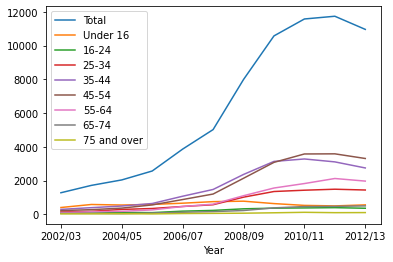

In [162]:
data_age.plot()

Ups. Ada masalah: Data asli kita berisi total yang menutupi bidang lainnya. Kita perlu menyingkirkannya.



In [163]:
data_age_minus_total = data_age.drop('Total', axis=1)


<AxesSubplot:xlabel='Year'>

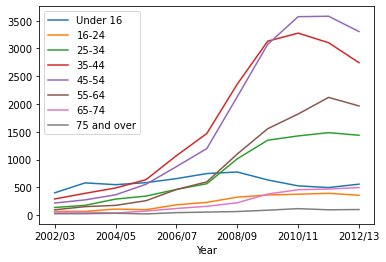

In [164]:
data_age_minus_total.plot()


Jauh lebih baik. Kita benar-benar dapat melihat kelompok usia individu sekarang. Bisakah kita melihat kelompok usia mana yang memiliki obesitas tertinggi?

Kembali ke pertanyaan awal kita: Are children getting fatter?

Mari kita buat plot sebagian kecil data: anak-anak di bawah usia 16 tahun dan orang dewasa dengan rentang usia 35-44 tahun.

<AxesSubplot:xlabel='Year'>

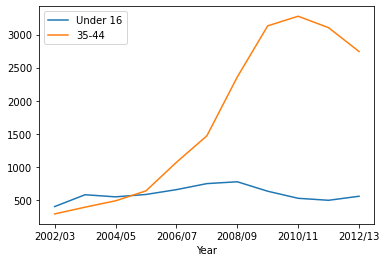

In [165]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

So who is getting fatter?

Ketika obesitas anak sedikit menurun, orang tua mereka membengkak. Jadi nampaknya para orang tua lebih perlu mengkhawatirkan diri sendiri daripada anak-anaknya.



## Time Series

deret waktu adalah serangkaian pengamatan yang diambil pada waktu tertentu biasanya pada interval yang sama

itu digunakan untuk memprediksi nilai masa depan berdasarkan nilai yang diamati sebelumnya

Why ? 

dalam analisis ini, Anda hanya memiliki satu variabel - Waktu

Anda dapat menganalisis data deret waktu ini untuk mengekstrak statistik yang berarti dan karakteristik lainnya


Peramalan Bisnis

Memahami perilaku masa lalu

Rencanakan masa depan

mengevaluasi pencapaian saat ini


Components of Time Series 
  Trend 
   Seasonality 
   Irregularity 
   Cyclic


#### Basic Time Series Manipulation


Pertama import libraries yang kita butuhkan dan gunakan untuk membuat date range.


In [166]:
from datetime import datetime

In [168]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

Date range ini memiliki timestamps dengan frekuensi per jam. Jika kita memanggil date_rng kita akan melihat seperti berikut:

In [169]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [170]:
df = pd.DataFrame(date_rng, columns=['date'])

In [171]:
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [172]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [173]:
df.head()

,date,data
0,2020-01-01 00:00:00,40
1,2020-01-01 01:00:00,97
2,2020-01-01 02:00:00,78
3,2020-01-01 03:00:00,78
4,2020-01-01 04:00:00,50


Jika kita ingin melakukan manipulasi deret waktu/time series, 
kita perlu memiliki date time index sehingga data frame kita di indeks pada timestamp.

Konversikan indeks data frame menjadi datetime index dan tampilkan elemen pertama:

In [174]:
df['datetime'] = pd.to_datetime(df['date'])

In [175]:
df

,date,data,datetime
0,2020-01-01 00:00:00,40,2020-01-01 00:00:00
1,2020-01-01 01:00:00,97,2020-01-01 01:00:00
2,2020-01-01 02:00:00,78,2020-01-01 02:00:00
3,2020-01-01 03:00:00,78,2020-01-01 03:00:00
4,2020-01-01 04:00:00,50,2020-01-01 04:00:00
...,...,...,...
164,2020-01-07 20:00:00,3,2020-01-07 20:00:00
165,2020-01-07 21:00:00,46,2020-01-07 21:00:00
166,2020-01-07 22:00:00,43,2020-01-07 22:00:00
167,2020-01-07 23:00:00,27,2020-01-07 23:00:00


In [176]:
df = df.set_index('datetime')
df 

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,40
2020-01-01 01:00:00,2020-01-01 01:00:00,97
2020-01-01 02:00:00,2020-01-01 02:00:00,78
2020-01-01 03:00:00,2020-01-01 03:00:00,78
2020-01-01 04:00:00,2020-01-01 04:00:00,50
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,3
2020-01-07 21:00:00,2020-01-07 21:00:00,46
2020-01-07 22:00:00,2020-01-07 22:00:00,43


In [177]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=169, freq=None)

In [95]:
df.drop(['date'], axis=1, inplace=True)

In [96]:
df.head()

,data
datetime,
2020-01-01 00:00:00,87
2020-01-01 01:00:00,81
2020-01-01 02:00:00,50
2020-01-01 03:00:00,56
2020-01-01 04:00:00,80


Bagaimana jika ‘time’ stamps dalam data kita sebenarnya berjenis string vs. numerik?

Mari kita ubah date_rng kita menjadi list of string dan kemudian ubah string tersebut menjadi stempel waktu.

In [179]:
string_date_rng = [str(x) for x in date_rng]

In [180]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

Kita dapat mengonversi string menjadi timestamps dengan melihat formatnya, lalu melihat nilainya:



In [182]:
pd.to_datetime?

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible',
    errors: 'str' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool | None' = None,
    format: 'str | None' = None,
    exact: 'bool' = True,
    unit: 'str | None' = None,
    infer_datetime_format: 'bool' = False,
    origin='unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime.
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception.
    - If 'coerce', then invalid parsing will be set as NaT.
    - If 'ignore', then invalid parsing will return the input.
dayfirst : bool, default False
    Specify a date parse order if `arg` is str or its list-likes.
    If True, parses dates with the 

In [181]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)


infer_datetime_format : boolean, default Salah

Jika True dan parse_dates diaktifkan, panda akan mencoba menyimpulkan format string datetime di kolom, dan jika dapat disimpulkan, beralih ke metode parsing yang lebih cepat. Dalam beberapa kasus, ini dapat meningkatkan kecepatan penguraian sebesar 5-10x.

In [183]:
from dateutil import parser
from datetime import datetime

L = ['2018-01-05', '2018-12-20', '2018-03-30', '2018-04-15']*5000

%timeit [parser.parse(i) for i in L]                   # 1.57 s
%timeit [datetime.strptime(i, '%Y-%m-%d') for i in L]  # 338 ms

4.18 s ± 1.97 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
674 ms ± 47.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [184]:
timestamp_date_rng


DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

Tetapi bagaimana jika kita perlu mengubah format unique string?

Mari kita buat daftar tanggal yang berubah-ubah menjadi string dan mengubahnya menjadi timestamps:

In [185]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']


In [186]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [187]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

Seperti apa jadinya jika kita memasukkan ini ke dalam data frame?



In [188]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])


In [189]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


Kembali ke data frame asli kita, mari kita lihat datanya dengan parsing pada timestamp index:

Katakanlah kita hanya ingin melihat data di mana tanggalnya adalah tanggal 2 setiap bulannya, kita bisa menggunakan indeks seperti di bawah ini.

In [190]:
df[df.index.day == 2]

,date,data
datetime,,
2020-01-02 00:00:00,2020-01-02 00:00:00,15
2020-01-02 01:00:00,2020-01-02 01:00:00,0
2020-01-02 02:00:00,2020-01-02 02:00:00,69
2020-01-02 03:00:00,2020-01-02 03:00:00,25
2020-01-02 04:00:00,2020-01-02 04:00:00,46
2020-01-02 05:00:00,2020-01-02 05:00:00,14
2020-01-02 06:00:00,2020-01-02 06:00:00,61
2020-01-02 07:00:00,2020-01-02 07:00:00,35
2020-01-02 08:00:00,2020-01-02 08:00:00,13


Kita juga bisa langsung memanggil tanggal yang ingin kita lihat melalui index dari data frame:



In [191]:
df['2020-01-03']
#df.loc['2020-01-03']

/var/folders/k1/r4fr60zd1g773yvyq8583b5c0000gn/T/ipykernel_28486/3008404025.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,date,data
datetime,,
2020-01-03 00:00:00,2020-01-03 00:00:00,78
2020-01-03 01:00:00,2020-01-03 01:00:00,35
2020-01-03 02:00:00,2020-01-03 02:00:00,61
2020-01-03 03:00:00,2020-01-03 03:00:00,85
2020-01-03 04:00:00,2020-01-03 04:00:00,91
2020-01-03 05:00:00,2020-01-03 05:00:00,71
2020-01-03 06:00:00,2020-01-03 06:00:00,3
2020-01-03 07:00:00,2020-01-03 07:00:00,3
2020-01-03 08:00:00,2020-01-03 08:00:00,39


Bagaimana dengan memilih data di antara tanggal tertentu?


In [192]:
df['2020-01-04':'2020-01-06']


,date,data
datetime,,
2020-01-04 00:00:00,2020-01-04 00:00:00,12
2020-01-04 01:00:00,2020-01-04 01:00:00,71
2020-01-04 02:00:00,2020-01-04 02:00:00,57
2020-01-04 03:00:00,2020-01-04 03:00:00,98
2020-01-04 04:00:00,2020-01-04 04:00:00,63
...,...,...
2020-01-06 19:00:00,2020-01-06 19:00:00,15
2020-01-06 20:00:00,2020-01-06 20:00:00,60
2020-01-06 21:00:00,2020-01-06 21:00:00,95


Basic data frame yang telah kita buat memberi kita data dengan frekuensi per jam, tetapi kita dapat mengambil ulang sampel/resample data pada frekuensi yang berbeda dan menentukan bagaimana kita ingin menghitung summary statistic untuk frekuensi sampel baru.

Kami dapat mengambil min, max, average, sum, dll., Dari data pada frekuensi harian daripada frekuensi per jam seperti contoh di bawah ini tempat kita menghitung rata-rata harian dari data:



In [194]:
df.resample?

Signature:
df.resample(
    rule,
    axis=0,
    closed: 'str | None' = None,
    label: 'str | None' = None,
    convention: 'str' = 'start',
    kind: 'str | None' = None,
    loffset=None,
    base: 'int | None' = None,
    on=None,
    level=None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or down-sampling. For `Series` this
    will default to 0, i.e. along the rows. Must be
   

In [195]:
# Day       = D
#  3 minute = 3T 
# 30 second = 30S
df.resample('D').mean()

,data
datetime,
2020-01-01,56.041667
2020-01-02,42.791667
2020-01-03,52.708333
2020-01-04,57.958333
2020-01-05,50.625000
2020-01-06,52.958333
2020-01-07,52.750000
2020-01-08,52.000000


Bagaimana dengan window statistics seperti rolling mean atau rolling sum?

Mari buat kolom baru di df asli kita yang menghitung rolling sum selama periode 3 window dan kemudian lihat di bagian atas data frame:

In [196]:
df['rolling_sum'] = df.rolling(3).sum()


In [197]:
df.head()

,date,data,rolling_sum
datetime,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,40,NaN
2020-01-01 01:00:00,2020-01-01 01:00:00,97,NaN
2020-01-01 02:00:00,2020-01-01 02:00:00,78,215.0
2020-01-01 03:00:00,2020-01-01 03:00:00,78,253.0
2020-01-01 04:00:00,2020-01-01 04:00:00,50,206.0


In [198]:
df.head()


,date,data,rolling_sum
datetime,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,40,NaN
2020-01-01 01:00:00,2020-01-01 01:00:00,97,NaN
2020-01-01 02:00:00,2020-01-01 02:00:00,78,215.0
2020-01-01 03:00:00,2020-01-01 03:00:00,78,253.0
2020-01-01 04:00:00,2020-01-01 04:00:00,50,206.0


Kita dapat melihat bahwa pandas menghitung dengan benar dan hanya memiliki nilai yang valid ketika ada tiga periode untuk melihat ke belakang.

Ini adalah kesempatan bagus untuk melihat bagaimana kita dapat melakukan forward or backfilling data saat bekerja dengan nilai data yang hilang.

Berikut df kita, tetapi dengan kolom baru yang mengambil rolling sum dan backfills data:

In [199]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')


In [200]:
df.head()

,date,data,rolling_sum,rolling_sum_backfilled
datetime,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,40,NaN,215.0
2020-01-01 01:00:00,2020-01-01 01:00:00,97,NaN,215.0
2020-01-01 02:00:00,2020-01-01 02:00:00,78,215.0,215.0
2020-01-01 03:00:00,2020-01-01 03:00:00,78,253.0,253.0
2020-01-01 04:00:00,2020-01-01 04:00:00,50,206.0,206.0


### Time Series on Dataset


In [201]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

DataFrame memiliki 4383 baris, mencakup periode dari 1 Januari 2006 hingga 31 Desember 2017. Untuk melihat seperti apa datanya, mari gunakan method head() dan tail() untuk menampilkan tiga baris pertama dan tiga baris terakhir

In [202]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [203]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [204]:
# merubah  kolom Date  set sebagai indeks DataFrame.

opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [205]:
opsd_daily.index


Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

Alternatifnya, kita dapat menggabungkan langkah-langkah di atas menjadi satu baris, menggunakan parameter index_col dan parse_dates dari fungsi read_csv(). Ini seringkali merupakan jalan pintas yang berguna.

In [226]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', 
                index_col=0, parse_dates=True)

In [208]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Aspek berguna lainnya dari Datetime Index adalah bahwa setiap komponen tanggal / waktu tersedia sebagai atribut seperti tahun, bulan, hari, dan seterusnya. Mari tambahkan beberapa kolom lagi ke opsd_daily, yang berisi tahun, bulan, dan hari kerja.

In [227]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [228]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [229]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

Kita juga dapat memilih slice dari hari, seperti '2014-01-20': '2014-01-22'. Seperti pengindeksan berbasis label biasa dengan loc, slice tersebut menyertakan kedua titik akhir.

In [230]:
opsd_daily.loc['2014-01-20':'2014-01-22']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


Fitur lain yang sangat berguna dari time series pandas adalah partial-string indexing, di mana kita dapat memilih semua tanggal / waktu yang sebagian cocok dengan string yang diberikan. Misalnya, kita dapat memilih seluruh tahun 2006 dengan opsd_daily.loc['2006'], atau seluruh bulan Februari 2012 dengan opsd_daily.loc['2012-02'].



In [231]:
opsd_daily.loc['2012-02']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


Kita dapat dengan mudah memvisualisasikan data time series kita. Di bagian ini, kita akan membahas beberapa contoh dan beberapa penyesuaian yang berguna untuk plot time series.

Mari kita buat line plot dari time series konsumsi listrik harian di Jerman, menggunakan method plot() DataFrame.

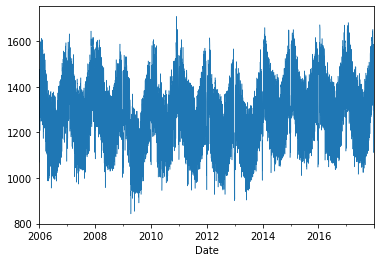

In [232]:
opsd_daily['Consumption'].plot(linewidth=0.5);


Kita dapat melihat bahwa method plot() memilih lokasi tick yang cukup bagus (setiap dua tahun) dan label (years) untuk sumbu x, yang sangat membantu. Namun, dengan banyaknya titik data, line plot menjadi padat dan sulit untuk dibaca.

Mari kita plot data sebagai titik-titik, dan lihat juga time series dari Matahari dan Angin.



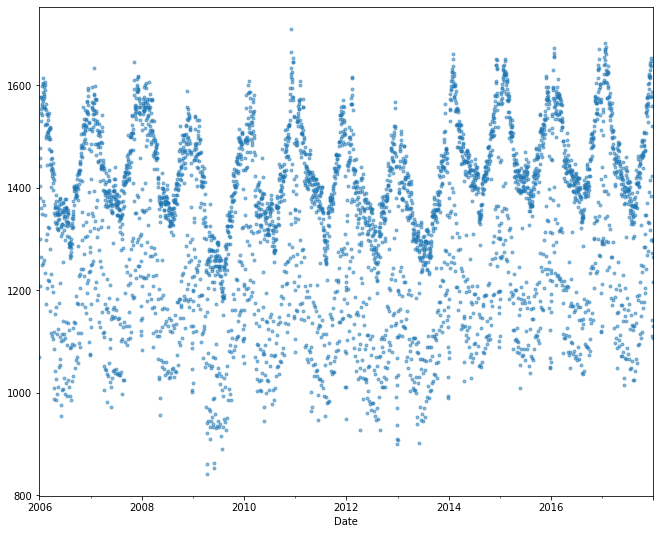

In [233]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

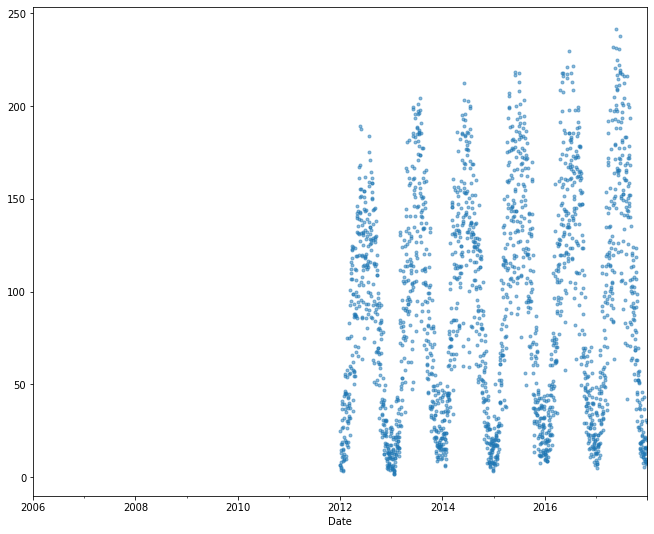

In [234]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

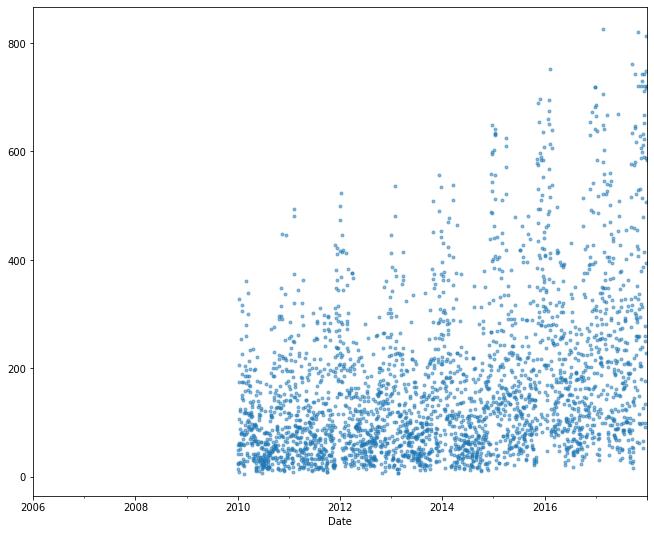

In [218]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

Kita sudah bisa melihat beberapa pola menarik yang muncul:

Konsumsi listrik tertinggi ada di musim dingin, kemungkinan karena pemanas listrik dan peningkatan penggunaan penerangan, dan terendah di musim panas.

Produksi tenaga surya paling tinggi di musim panas, saat sinar matahari paling melimpah, dan paling rendah di musim dingin.

Produksi tenaga angin paling tinggi di musim dingin, mungkin karena angin yang lebih kuat dan badai yang lebih sering, dan paling rendah di musim panas.

Tampaknya ada tren peningkatan yang kuat dalam produksi tenaga angin selama bertahun-tahun.

Ketiga time series dengan jelas menunjukkan periodisitas — sering disebut sebagai seasonality dalam time series analysis — di mana sebuah pola berulang berulang kali pada interval waktu yang teratur. 

Rangkaian waktu Consumption, Solar, dan Wind berosilasi antara nilai tinggi dan rendah dalam skala waktu tahunan, sesuai dengan perubahan cuaca musiman sepanjang tahun. 

Namun, musim secara umum tidak harus sesuai dengan musim meteorologi. Misalnya, data penjualan ritel sering kali menunjukkan musim tahunan dengan peningkatan penjualan pada bulan November dan Desember, menjelang liburan.

Seasonality juga dapat terjadi pada skala waktu lain. Plot di atas menunjukkan bahwa konsumsi listrik Jerman mungkin terlihat weekly seasonality, sesuai dengan hari kerja dan akhir pekan. 

Mari kita plot deret waktu dalam satu tahun untuk menyelidiki lebih lanjut.

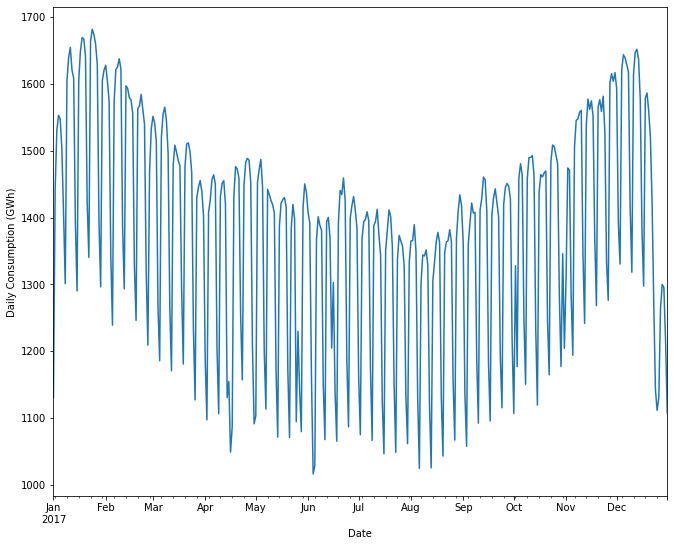

In [219]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Sekarang kita dapat dengan jelas melihat osilasi mingguan/weekly oscillations. Ciri menarik lain yang terlihat pada tingkat granularitas ini adalah penurunan drastis konsumsi listrik pada awal Januari dan akhir Desember, selama liburan.

Mari kita perbesar lebih jauh dan lihat bulan Januari dan Februari saja.

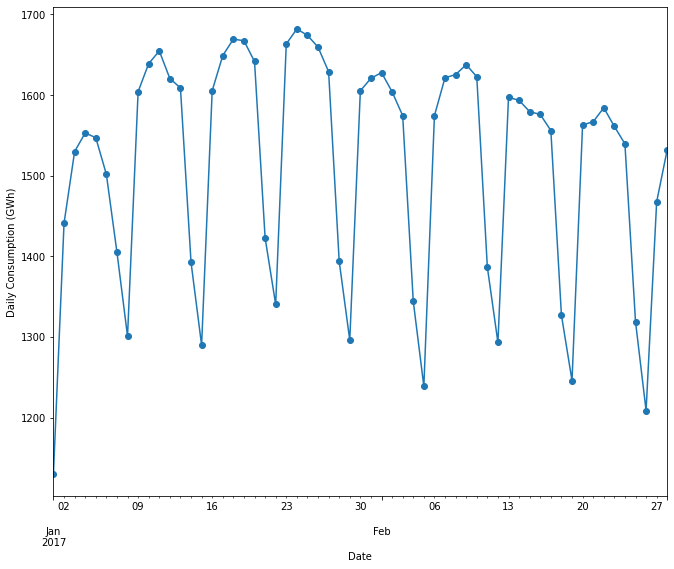

In [220]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Selanjutnya, mari kita jelajahi lebih jauh seasonality data kita dengan fungsi box plots untuk mengelompokkan data berdasarkan periode waktu yang berbeda dan menampilkan distribusi untuk setiap kelompok. Pertama-tama, kita akan mengelompokkan data berdasarkan bulan, untuk memvisualisasikan yearly seasonality.

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

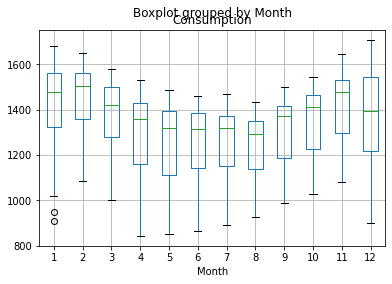

In [221]:
opsd_daily.boxplot(column=['Consumption'], by='Month')


<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

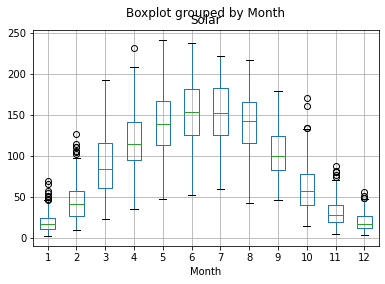

In [222]:
opsd_daily.boxplot(column=['Solar'], by='Month')


<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

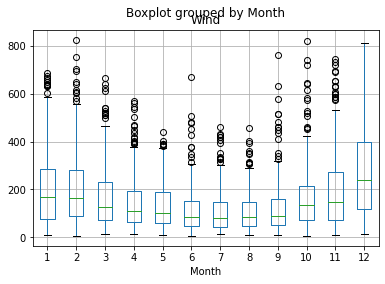

In [223]:
opsd_daily.boxplot(column=['Wind'], by='Month')


box plots berikut mengonfirmasi yearly seasonality yang kitalihat di plot sebelumnya dan memberikan beberapa insights:

Meskipun konsumsi listrik umumnya lebih tinggi di musim dingin dan lebih rendah di musim panas, 

median dan dua kuartil lebih rendah pada bulan Desember dan Januari dibandingkan dengan November dan Februari, kemungkinan karena bisnis tutup selama liburan. 

Kita melihat ini dalam rangkaian waktu untuk tahun 2017, dan box plot menegaskan bahwa ini adalah pola yang konsisten selama bertahun-tahun.

Sementara produksi tenaga surya dan angin sama-sama menunjukkan yearly seasonality, distribusi tenaga angin memiliki lebih banyak outliers, yang mencerminkan efek kecepatan angin ekstrem sesekali yang terkait dengan badai dan kondisi cuaca sementara lainnya.

Selanjutnya, mari kelompokkan rangkaian waktu konsumsi listrik berdasarkan hari dalam seminggu, untuk menjelajahi weekly seasonality.

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

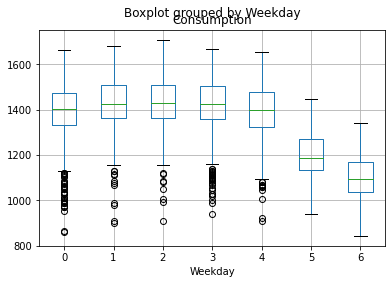

In [224]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')


Seperti yang diharapkan, konsumsi listrik secara signifikan lebih tinggi pada hari kerja dibandingkan pada akhir pekan. Outliers rendah pada hari kerja mungkin selama hari libur/holidays.

Seringkali berguna untuk resample data time series kita ke frekuensi yang lebih rendah atau lebih tinggi. 

Resampling ke frekuensi yang lebih rendah (downsampling) biasanya melibatkan operasi agregasi - misalnya, menghitung total penjualan bulanan dari data harian. 

Resampling ke frekuensi yang lebih tinggi (upsampling) kurang umum dan sering kali melibatkan interpolasi atau metode pengisian data lainnya - misalnya, menginterpolasi data cuaca setiap jam hingga interval 10 menit untuk dimasukkan ke model ilmiah.

Kita akan fokus di sini pada downsampling, mengeksplorasi bagaimana hal itu dapat membantu kita menganalisis data OPSD dalam berbagai skala waktu. 

Kita menggunakan method resample() DataFrame, yang membagi DatetimeIndex ke dalam time bins dan mengelompokkan data menurut time bin. 

Metode resample() mengembalikan objek Resampler, mirip dengan objek GroupBy pandas. 

Kita kemudian dapat menerapkan metode agregasi seperti  mean(), median(), sum(), dll., Ke grup data untuk setiap time bin.

Misalnya, mari kita resample data menjadi weekly mean time series.



In [225]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Baris pertama di atas, berlabel 2006-01-01, berisi rata-rata dari semua data yang ada dalam time bin 2006-01-01 hingga 2006-01-07. Baris kedua, berlabel 2006-01-08, berisi data rata-rata untuk time bin 2006-01-08 hingga 2006-01-14, dan seterusnya.

Berdasarkan konstruksi, deret waktu mingguan kita memiliki 1/7 poin data sebanyak deret waktu harian. Kita dapat mengonfirmasi ini dengan membandingkan jumlah baris dari dua DataFrame.

In [208]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Mari kita gambarkan rangkaian waktu Solar harian dan mingguan dalam satu periode enam bulan untuk membandingkannya.



<AxesSubplot:xlabel='Date'>

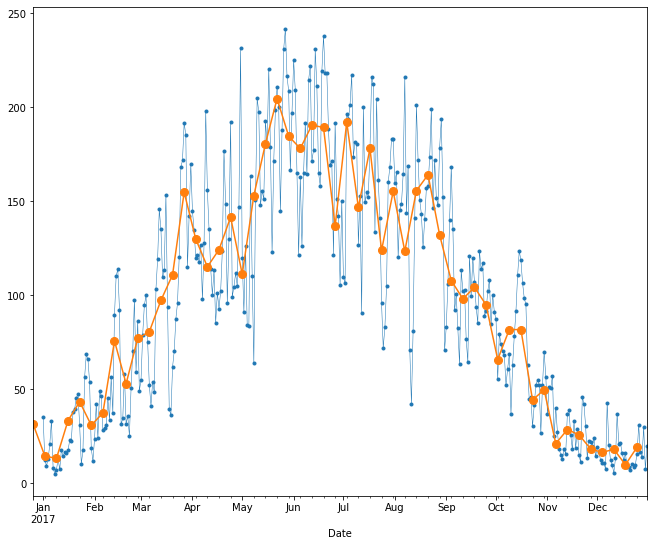

In [236]:
start, end = '2017-01', '2018-01'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

Kita dapat melihat bahwa deret waktu rata-rata mingguan lebih halus daripada deret waktu harian karena variabilitas frekuensi yang lebih tinggi telah dirata-ratakan dalam resampling.



<AxesSubplot:xlabel='Date'>

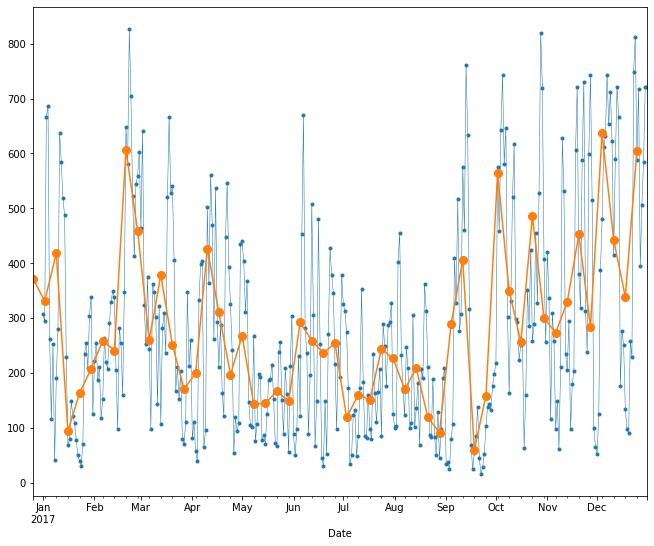

In [237]:
start, end = '2017-01', '2018-01'

opsd_daily.loc[start:end, 'Wind'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Wind'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))